In [4]:
#!pip install yfinance
#!pip install matplotlib

In [257]:
import yfinance as yf  # For stock data
import pandas as pd    # For data manipulation
import numpy as np     # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import datetime

# Importing data from yahoo data

In [388]:
# Define parameters
ticker = "^GSPC"  
#start_date = "2025-01-01"
#end_date = "2025-06-01"

# Fetch historical stock data
data = yf.download('^GSPC', interval="1d", period='1y')
#data = yf.download('^GSPC', interval="1d", start="2024-01-01", end="2024-03-31")

data = data.reset_index()
data = data.reset_index()

data.columns = [c[0] for c in data.columns]

# Display first few rows
print(data.shape)
print(data.head())

/tmp/ipykernel_586164/2625899365.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^GSPC', interval="1d", period='1y')
[*********************100%***********************]  1 of 1 completed

(250, 7)
   index       Date        Close         High          Low         Open  \
0      0 2024-09-23  5718.569824  5725.359863  5704.220215  5711.899902   
1      1 2024-09-24  5732.930176  5735.319824  5698.990234  5727.660156   
2      2 2024-09-25  5722.259766  5741.029785  5712.060059  5733.649902   
3      3 2024-09-26  5745.370117  5767.370117  5721.009766  5762.220215   
4      4 2024-09-27  5738.169922  5763.779785  5727.339844  5755.359863   

       Volume  
0  3529550000  
1  3872710000  
2  3624910000  
3  4391180000  
4  3898530000  


In [389]:
data

,index,Date,Close,High,Low,Open,Volume
0,0,2024-09-23,5718.569824,5725.359863,5704.220215,5711.899902,3529550000
1,1,2024-09-24,5732.930176,5735.319824,5698.990234,5727.660156,3872710000
2,2,2024-09-25,5722.259766,5741.029785,5712.060059,5733.649902,3624910000
3,3,2024-09-26,5745.370117,5767.370117,5721.009766,5762.220215,4391180000
4,4,2024-09-27,5738.169922,5763.779785,5727.339844,5755.359863,3898530000
...,...,...,...,...,...,...,...
245,245,2025-09-16,6606.759766,6626.990234,6600.109863,6624.129883,5359510000
246,246,2025-09-17,6600.350098,6624.390137,6551.149902,6604.870117,5805340000
247,247,2025-09-18,6631.959961,6656.799805,6611.890137,6626.850098,5292400000
248,248,2025-09-19,6664.359863,6671.819824,6630.310059,6647.109863,9125960000


# Computes indicators

In [390]:
# Calculate Simple Moving Averages
short_window = 50  # Short-term SMA
long_window = 200  # Long-term SMA

data['SMA50'] = data['Close'].rolling(window=short_window).mean()
data['SMA200'] = data['Close'].rolling(window=long_window).mean()

data

,index,Date,Close,High,Low,Open,Volume,SMA50,SMA200
0,0,2024-09-23,5718.569824,5725.359863,5704.220215,5711.899902,3529550000,NaN,NaN
1,1,2024-09-24,5732.930176,5735.319824,5698.990234,5727.660156,3872710000,NaN,NaN
2,2,2024-09-25,5722.259766,5741.029785,5712.060059,5733.649902,3624910000,NaN,NaN
3,3,2024-09-26,5745.370117,5767.370117,5721.009766,5762.220215,4391180000,NaN,NaN
4,4,2024-09-27,5738.169922,5763.779785,5727.339844,5755.359863,3898530000,NaN,NaN
...,...,...,...,...,...,...,...,...,...
245,245,2025-09-16,6606.759766,6626.990234,6600.109863,6624.129883,5359510000,6399.142373,5991.252639
246,246,2025-09-17,6600.350098,6624.390137,6551.149902,6604.870117,5805340000,6406.638975,5994.146240
247,247,2025-09-18,6631.959961,6656.799805,6611.890137,6626.850098,5292400000,6414.012979,5997.312339
248,248,2025-09-19,6664.359863,6671.819824,6630.310059,6647.109863,9125960000,6421.690977,6000.472239


# Example 1 (simple buy sell strategy)

In [14]:
data_e1_df = data.copy()

In [15]:
# Define signals
data_e1_df['Signal'] = 0  # Initialize Signal column with 0
data_e1_df.loc[data_e1_df['SMA50'] > data_e1_df['SMA200'], 'Signal'] = 1  # Buy
data_e1_df.loc[data_e1_df['SMA50'] < data_e1_df['SMA200'], 'Signal'] = -1  # Sell

data_e1_df

,index,Datetime,Close,High,Low,Open,Volume,SMA50,SMA200,Signal
0,0,2023-09-25 13:30:00+00:00,4325.700195,4336.209961,4302.700195,4310.620117,547729786,NaN,NaN,0
1,1,2023-09-25 17:30:00+00:00,4337.310059,4338.509766,4316.379883,4325.729980,638298104,NaN,NaN,0
2,2,2023-09-26 13:30:00+00:00,4285.830078,4313.009766,4282.000000,4312.879883,615390438,NaN,NaN,0
3,3,2023-09-26 17:30:00+00:00,4273.669922,4287.240234,4265.979980,4285.779785,802166666,NaN,NaN,0
4,4,2023-09-27 13:30:00+00:00,4243.750000,4292.069824,4243.549805,4282.629883,693003096,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...
990,990,2025-09-18 17:30:00+00:00,6631.169922,6643.290039,6627.919922,6641.879883,1081953000,6492.721436,6169.883618,1
991,991,2025-09-19 13:30:00+00:00,6651.129883,6653.979980,6630.310059,6647.109863,931333711,6496.385430,6175.521667,1
992,992,2025-09-19 17:30:00+00:00,6662.839844,6671.819824,6649.799805,6651.069824,1194847000,6500.286230,6181.478467,1
993,993,2025-09-22 13:30:00+00:00,6691.600098,6691.990234,6648.069824,6654.279785,1052320094,6504.960029,6187.293267,1


In [16]:
# Create positions (shift signals to avoid look-ahead bias)
data_e1_df['Position'] = data_e1_df['Signal'].shift(1)

# Calculate daily percentage change in stock prices
data_e1_df['Daily Return'] = data_e1_df['Close'].pct_change()

# Calculate returns based on the strategy
data_e1_df['Strategy Return'] = data_e1_df['Position'] * data_e1_df['Daily Return']

data_e1_df.loc[
    data_e1_df['Strategy Return'].isnull()
    ,'Strategy Return'] = 0

# Calculate cumulative returns
data_e1_df['Cumulative Market Return'] = (1 + data_e1_df['Daily Return']).cumprod()
data_e1_df['Cumulative Strategy Return'] = (1 + data_e1_df['Strategy Return']).cumprod()

data_e1_df

,index,Datetime,Close,High,Low,Open,Volume,SMA50,SMA200,Signal,Position,Daily Return,Strategy Return,Cumulative Market Return,Cumulative Strategy Return
0,0,2023-09-25 13:30:00+00:00,4325.700195,4336.209961,4302.700195,4310.620117,547729786,NaN,NaN,0,NaN,NaN,0.000000,NaN,1.000000
1,1,2023-09-25 17:30:00+00:00,4337.310059,4338.509766,4316.379883,4325.729980,638298104,NaN,NaN,0,0.0,0.002684,0.000000,1.002684,1.000000
2,2,2023-09-26 13:30:00+00:00,4285.830078,4313.009766,4282.000000,4312.879883,615390438,NaN,NaN,0,0.0,-0.011869,-0.000000,0.990783,1.000000
3,3,2023-09-26 17:30:00+00:00,4273.669922,4287.240234,4265.979980,4285.779785,802166666,NaN,NaN,0,0.0,-0.002837,-0.000000,0.987972,1.000000
4,4,2023-09-27 13:30:00+00:00,4243.750000,4292.069824,4243.549805,4282.629883,693003096,NaN,NaN,0,0.0,-0.007001,-0.000000,0.981055,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,990,2025-09-18 17:30:00+00:00,6631.169922,6643.290039,6627.919922,6641.879883,1081953000,6492.721436,6169.883618,1,1.0,-0.001612,-0.001612,1.532970,1.173538
991,991,2025-09-19 13:30:00+00:00,6651.129883,6653.979980,6630.310059,6647.109863,931333711,6496.385430,6175.521667,1,1.0,0.003010,0.003010,1.537585,1.177071
992,992,2025-09-19 17:30:00+00:00,6662.839844,6671.819824,6649.799805,6651.069824,1194847000,6500.286230,6181.478467,1,1.0,0.001761,0.001761,1.540292,1.179143
993,993,2025-09-22 13:30:00+00:00,6691.600098,6691.990234,6648.069824,6654.279785,1052320094,6504.960029,6187.293267,1,1.0,0.004317,0.004317,1.546940,1.184233


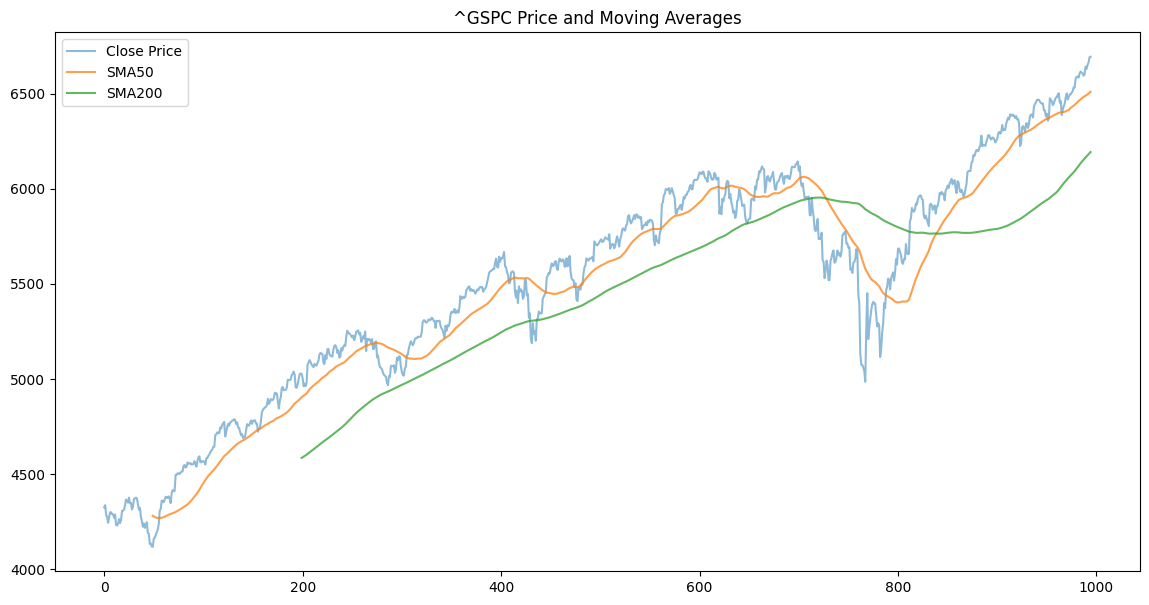

In [17]:
plt.figure(figsize=(14, 7))
plt.plot(data_e1_df['Close'], label='Close Price', alpha=0.5)
plt.plot(data_e1_df['SMA50'], label='SMA50', alpha=0.75)
plt.plot(data_e1_df['SMA200'], label='SMA200', alpha=0.75)
plt.title(f"{ticker} Price and Moving Averages")
plt.legend()
plt.show()

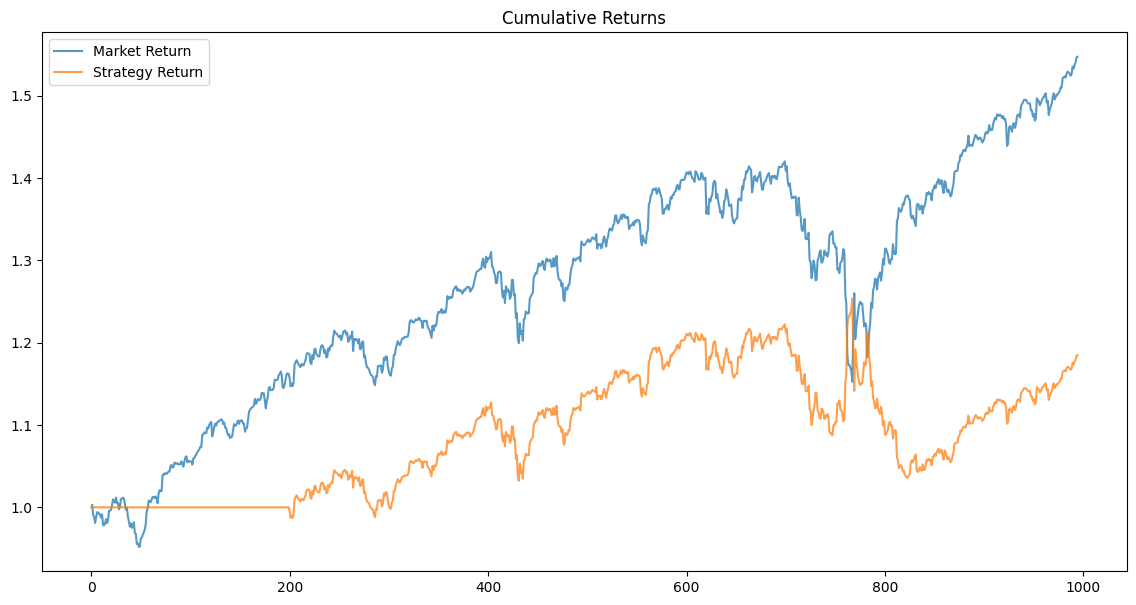

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(data_e1_df['Cumulative Market Return'], label='Market Return', alpha=0.75)
plt.plot(data_e1_df['Cumulative Strategy Return'], label='Strategy Return', alpha=0.75)
plt.title("Cumulative Returns")
plt.legend()
plt.show()

In [19]:
total_strategy_return = data_e1_df['Cumulative Strategy Return'].iloc[-1] - 1
total_market_return = data_e1_df['Cumulative Market Return'].iloc[-1] - 1

print(f"Total Strategy Return: {total_strategy_return:.2%}")
print(f"Total Market Return: {total_market_return:.2%}")

Total Strategy Return: 18.46%
Total Market Return: 54.74%


# Example 2 (15m temp)

In [747]:
# Define parameters
ticker = "^GSPC"  
#start_date = "2025-01-01"
#end_date = "2025-06-01"

# Fetch historical stock data
data = yf.download('^GSPC', interval="15m", period='60d')
#data = yf.download('^GSPC', interval="1d", start="2024-01-01", end="2024-03-31")

data = data.reset_index()
data = data.reset_index()

data.columns = [c[0] for c in data.columns]

# Display first few rows
print(data.shape)
print(data.tail(30))

/tmp/ipykernel_1362691/3902235362.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^GSPC', interval="15m", period='60d')
[*********************100%***********************]  1 of 1 completed

(1548, 7)
      index                  Datetime        Close         High          Low  \
1518   1518 2025-09-23 19:00:00+00:00  6649.009766  6652.540039  6646.930176   
1519   1519 2025-09-23 19:15:00+00:00  6649.479980  6653.910156  6647.979980   
1520   1520 2025-09-23 19:30:00+00:00  6655.319824  6655.589844  6648.950195   
1521   1521 2025-09-23 19:45:00+00:00  6658.089844  6661.589844  6653.160156   
1522   1522 2025-09-24 13:30:00+00:00  6661.109863  6672.660156  6660.089844   
1523   1523 2025-09-24 13:45:00+00:00  6656.910156  6661.250000  6649.490234   
1524   1524 2025-09-24 14:00:00+00:00  6658.600098  6659.229980  6652.540039   
1525   1525 2025-09-24 14:15:00+00:00  6657.859863  6660.209961  6655.319824   
1526   1526 2025-09-24 14:30:00+00:00  6657.830078  6659.259766  6654.390137   
1527   1527 2025-09-24 14:45:00+00:00  6655.279785  6662.140137  6654.189941   
1528   1528 2025-09-24 15:00:00+00:00  6650.419922  6657.359863  6650.379883   
1529   1529 2025-09-24 15:15:0

In [748]:
data_e2_df = data.copy()

data_e2_df['Date'] = data_e2_df['Datetime'].apply(lambda x: x.date())
data_e2_df['Time'] = data_e2_df['Datetime'].apply(lambda x: str(x.hour).zfill(2) + str(x.minute).zfill(2))
data_e2_df['SMA20'] = data_e2_df['Close'].rolling(window=20).mean()
data_e2_df['SMA50'] = data_e2_df['Close'].rolling(window=100).mean()
data_e2_df['SMA200'] = data_e2_df['Close'].rolling(window=200).mean()

# Calculate daily percentage change in stock prices
data_e2_df['current_return'] = data_e2_df['Close'].pct_change()
data_e2_df['Open_adj'] = data_e2_df['Close'].shift(1)

data_e2_df['sma50_diff'] = data_e2_df['Close'] - data_e2_df['SMA50']

data_e2_df

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,SMA20,SMA50,SMA200,current_return,Open_adj,sma50_diff
0,0,2025-07-01 13:30:00+00:00,6188.490234,6192.009766,6184.959961,6187.250000,96894425,2025-07-01,1330,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2025-07-01 13:45:00+00:00,6194.990234,6200.120117,6188.439941,6188.490234,123250159,2025-07-01,1345,NaN,NaN,NaN,0.001050,6188.490234,NaN
2,2,2025-07-01 14:00:00+00:00,6199.049805,6199.330078,6191.950195,6194.850098,119757051,2025-07-01,1400,NaN,NaN,NaN,0.000655,6194.990234,NaN
3,3,2025-07-01 14:15:00+00:00,6193.729980,6203.209961,6190.620117,6199.220215,127878699,2025-07-01,1415,NaN,NaN,NaN,-0.000858,6199.049805,NaN
4,4,2025-07-01 14:30:00+00:00,6188.600098,6199.000000,6187.720215,6193.609863,151304546,2025-07-01,1430,NaN,NaN,NaN,-0.000828,6193.729980,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1543,2025-09-24 18:45:00+00:00,6637.049805,6637.609863,6631.379883,6633.379883,66691000,2025-09-24,1845,6640.625000,6662.564595,6638.428042,0.000556,6633.359863,-25.514790
1544,1544,2025-09-24 19:00:00+00:00,6632.500000,6637.299805,6632.310059,6637.089844,69655000,2025-09-24,1900,6639.319995,6662.460693,6638.506892,-0.000686,6637.049805,-29.960693
1545,1545,2025-09-24 19:15:00+00:00,6633.569824,6634.950195,6631.759766,6632.509766,77749000,2025-09-24,1915,6638.105493,6662.318491,6638.581741,0.000161,6632.500000,-28.748667
1546,1546,2025-09-24 19:30:00+00:00,6632.149902,6635.720215,6631.990234,6633.689941,113715000,2025-09-24,1930,6636.821484,6662.163989,6638.660139,-0.000214,6633.569824,-30.014087


In [749]:
diff_df = data_e2_df[data_e2_df['sma50_diff'].isnull()==False][['sma50_diff']]
diff_df['bucket_diff'] = pd.qcut(diff_df['sma50_diff'],11, labels=False)

diff_df

obs_df = diff_df.groupby(
    ['bucket_diff'],
    as_index=False
).agg(
    min_diff = ('sma50_diff','min'),
    max_diff = ('sma50_diff','max'),
    avg_diff = ('sma50_diff','mean'),
    frequence = ('sma50_diff','count'),
).copy()

obs_df

,bucket_diff,min_diff,max_diff,avg_diff,frequence
0,0,-145.230752,-30.126812,-65.384432,132
1,1,-30.014087,-10.221650,-18.508973,132
2,2,-10.078872,-1.314883,-6.110592,131
3,3,-1.268828,8.342300,3.318384,132
4,4,8.356030,16.802119,12.889225,132
5,5,16.806152,24.043105,20.260113,131
6,6,24.110312,31.201387,27.511522,132
7,7,31.206377,37.759585,34.228076,132
8,8,37.887466,46.013374,41.838415,131
9,9,46.095220,53.500825,49.199193,132


In [750]:
import statsmodels.api as sm
#!pip install statsmodels

In [751]:
slope_ls = [0]

def slope_f(input_df, col, cicles):

    input_df = input_df.reset_index(drop=True).copy()

    datapoints_df = input_df[[col]].copy()

    for p in range(0, cicles):
        col_name = 'y'+str(p)
        datapoints_df[col_name] = input_df[col].shift(p).tolist()

    def compute_slope_f(x, cicles):

        slope = None
        X1 = []
        y = []
        
        try:
            for q in range(0,cicles):
                col_name = 'y'+str(cicles - (q+1))
                y.append(x[col_name])
                X1.append(q)
            
            X1 = np.array(X1)
            y = np.array(y)
            X1 = sm.add_constant(X1) # Adds a constant column for the intercept
            model = sm.OLS(y, X1)
            results = model.fit()
            
            slope = results.params.tolist()[1]
            
        except Exception as e:
            print(e)
            pass
    
        return slope

    datapoints_df['slope'] = datapoints_df.apply(lambda x: compute_slope_f(x, cicles), axis=1)

    return datapoints_df['slope'].tolist()
    
#datapoints_df = slope_f(data_e2_df, 'Close', 3)
#datapoints_df



data_e2_df['slope3'] = slope_f(data_e2_df, 'Close', 3)
data_e2_df['slope4'] = slope_f(data_e2_df, 'Close', 4)
data_e2_df



,index,Datetime,Close,High,Low,Open,Volume,Date,Time,SMA20,SMA50,SMA200,current_return,Open_adj,sma50_diff,slope3,slope4
0,0,2025-07-01 13:30:00+00:00,6188.490234,6192.009766,6184.959961,6187.250000,96894425,2025-07-01,1330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2025-07-01 13:45:00+00:00,6194.990234,6200.120117,6188.439941,6188.490234,123250159,2025-07-01,1345,NaN,NaN,NaN,0.001050,6188.490234,NaN,NaN,NaN
2,2,2025-07-01 14:00:00+00:00,6199.049805,6199.330078,6191.950195,6194.850098,119757051,2025-07-01,1400,NaN,NaN,NaN,0.000655,6194.990234,NaN,5.279785,NaN
3,3,2025-07-01 14:15:00+00:00,6193.729980,6203.209961,6190.620117,6199.220215,127878699,2025-07-01,1415,NaN,NaN,NaN,-0.000858,6199.049805,NaN,-0.630127,1.977881
4,4,2025-07-01 14:30:00+00:00,6188.600098,6199.000000,6187.720215,6193.609863,151304546,2025-07-01,1430,NaN,NaN,NaN,-0.000828,6193.729980,NaN,-5.224854,-2.449023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1543,2025-09-24 18:45:00+00:00,6637.049805,6637.609863,6631.379883,6633.379883,66691000,2025-09-24,1845,6640.625000,6662.564595,6638.428042,0.000556,6633.359863,-25.514790,3.609863,2.446973
1544,1544,2025-09-24 19:00:00+00:00,6632.500000,6637.299805,6632.310059,6637.089844,69655000,2025-09-24,1900,6639.319995,6662.460693,6638.506892,-0.000686,6637.049805,-29.960693,-0.429932,1.169971
1545,1545,2025-09-24 19:15:00+00:00,6633.569824,6634.950195,6631.759766,6632.509766,77749000,2025-09-24,1915,6638.105493,6662.318491,6638.581741,0.000161,6632.500000,-28.748667,-1.739990,-0.391992
1546,1546,2025-09-24 19:30:00+00:00,6632.149902,6635.720215,6631.990234,6633.689941,113715000,2025-09-24,1930,6636.821484,6662.163989,6638.660139,-0.000214,6633.569824,-30.014087,-0.175049,-1.362988


In [752]:
slopes_df = data_e2_df[data_e2_df['slope4'].isnull()==False][['slope4']]
slopes_df['bucket_slope'] = pd.qcut(slopes_df['slope4'],11, labels=False)

slopes_df

obs_df = slopes_df.groupby(
    ['bucket_slope'],
    as_index=False
).agg(
    min_s= ('slope4','min'),
    max_s = ('slope4','max'),
    avg_s = ('slope4','mean'),
    frequence = ('slope4','count'),
).copy()

obs_df

,bucket_slope,min_s,max_s,avg_s,frequence
0,0,-46.861865,-3.623047,-7.831656,141
1,1,-3.609863,-2.204980,-2.830613,140
2,2,-2.200049,-1.365039,-1.730905,141
3,3,-1.362988,-0.585107,-0.947219,140
4,4,-0.584961,-0.034961,-0.293629,140
5,5,-0.027051,0.591992,0.306118,141
6,6,0.601074,1.130029,0.864864,140
7,7,1.131006,1.808008,1.423360,140
8,8,1.809082,2.695996,2.228589,141
9,9,2.702979,4.435107,3.409854,140


In [753]:
prev_slope_ls = [0]
tendency_ls = [0]
acceleration_ls = [0]

def tendency_f(x):
    slope = x['slope4']
    prev_slope = prev_slope_ls[0]
    tendency = tendency_ls[0]
    acceleration = acceleration_ls[0]

    if (slope<0):
        
        if tendency > 0:
            tendency = 0
            
        if (slope < prev_slope):

            if acceleration < 0:
                acceleration = 0
            
            tendency = tendency - 1
            acceleration = acceleration + 1

        if (slope > prev_slope):

            if acceleration > 0:
                acceleration = 0

            acceleration = acceleration - 1

    if (slope>0):

        if tendency < 0:
            tendency = 0
        
        if (slope >= prev_slope):

            if acceleration < 0:
                acceleration = 0
            
            tendency = tendency + 1
            acceleration = acceleration + 1

        if (slope < prev_slope):

            if acceleration > 0:
                acceleration = 0

            acceleration = acceleration - 1

    tendency_ls[0] = tendency
    prev_slope_ls[0] = slope
    acceleration_ls[0] = acceleration

    return tendency, acceleration

info = data_e2_df.apply(lambda x: tendency_f(x), axis=1)
icols_ls = ['tendency', 'acceleration']
info_df = pd.DataFrame(info.tolist(), columns=icols_ls)

data_e2_df.loc[:,icols_ls] = info_df.loc[:,icols_ls]
data_e2_df

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,SMA20,SMA50,SMA200,current_return,Open_adj,sma50_diff,slope3,slope4,tendency,acceleration
0,0,2025-07-01 13:30:00+00:00,6188.490234,6192.009766,6184.959961,6187.250000,96894425,2025-07-01,1330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
1,1,2025-07-01 13:45:00+00:00,6194.990234,6200.120117,6188.439941,6188.490234,123250159,2025-07-01,1345,NaN,NaN,NaN,0.001050,6188.490234,NaN,NaN,NaN,0,0
2,2,2025-07-01 14:00:00+00:00,6199.049805,6199.330078,6191.950195,6194.850098,119757051,2025-07-01,1400,NaN,NaN,NaN,0.000655,6194.990234,NaN,5.279785,NaN,0,0
3,3,2025-07-01 14:15:00+00:00,6193.729980,6203.209961,6190.620117,6199.220215,127878699,2025-07-01,1415,NaN,NaN,NaN,-0.000858,6199.049805,NaN,-0.630127,1.977881,0,0
4,4,2025-07-01 14:30:00+00:00,6188.600098,6199.000000,6187.720215,6193.609863,151304546,2025-07-01,1430,NaN,NaN,NaN,-0.000828,6193.729980,NaN,-5.224854,-2.449023,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1543,2025-09-24 18:45:00+00:00,6637.049805,6637.609863,6631.379883,6633.379883,66691000,2025-09-24,1845,6640.625000,6662.564595,6638.428042,0.000556,6633.359863,-25.514790,3.609863,2.446973,2,2
1544,1544,2025-09-24 19:00:00+00:00,6632.500000,6637.299805,6632.310059,6637.089844,69655000,2025-09-24,1900,6639.319995,6662.460693,6638.506892,-0.000686,6637.049805,-29.960693,-0.429932,1.169971,2,-1
1545,1545,2025-09-24 19:15:00+00:00,6633.569824,6634.950195,6631.759766,6632.509766,77749000,2025-09-24,1915,6638.105493,6662.318491,6638.581741,0.000161,6632.500000,-28.748667,-1.739990,-0.391992,-1,1
1546,1546,2025-09-24 19:30:00+00:00,6632.149902,6635.720215,6631.990234,6633.689941,113715000,2025-09-24,1930,6636.821484,6662.163989,6638.660139,-0.000214,6633.569824,-30.014087,-0.175049,-1.362988,-2,2


In [812]:
# Computes Orders ans order steps

signal_ls = [0]

prev_signal_ls = [0]
order_number_ls = [0]
order_step_ls = [0]
open_price_ls = [0]
acum_strategy_gain_ls = [0] 
consecutive_loss_ls = [0]
order_gain_balance_ls = [0]
order_loss_balance_ls = [0]

def orders_steps_f(x):
    index = x['index']
    openn = x['Open_adj']
    close = x['Close']
    current_return = x['current_return']
    sma50 = x['SMA50']
    sma200 = x['SMA200']
    sma50_diff = x['sma50_diff']
    slope = x['slope4']
    tendency = x['tendency']
    time = int(x['Time'])

    signal = signal_ls[0]
    order_number = order_number_ls[0]
    order_step = order_step_ls[0]
    open_price = open_price_ls[0]
    acum_strategy_gain = acum_strategy_gain_ls[0]
    prev_slope = prev_slope_ls[0]
    order_gain_balance = order_gain_balance_ls[0]
    order_loss_balance = order_loss_balance_ls[0]

    start_order = False
    
    if (signal==0):

        if (0.8 < slope) & (-5 < sma50_diff < 70):
            signal = 1
            start_order = True

        if (2 < slope < 10) & (-10 < sma50_diff < 0):
            signal = 1
            start_order = True

        if (sma50_diff < -20):
            signal = 1
            start_order = True

    if start_order == True:
        order_step = 0
        order_number = order_number + 1
        open_price = close
        order_gain_balance = 0
        order_loss_balance = 0

    order_step = order_step + 1

    strategy_gain = (close - openn) * signal    
    strategy_return = current_return * signal

    if order_step == 1:
        strategy_gain = 0
        acum_strategy_gain = 0
        strategy_return = 0   
        
    if strategy_gain >= 0:
        order_gain_balance = order_gain_balance + strategy_gain

    if strategy_gain < 0:
        order_loss_balance = order_loss_balance + strategy_gain

    if acum_strategy_gain != 0:
        pp_change_gain = strategy_gain / acum_strategy_gain
    else:
        pp_change_gain = 0
    
    #if acum_strategy_gain < 0:
    #    pp_change_gain = pp_change_gain*(-1)

    acum_strategy_gain = acum_strategy_gain + strategy_gain

    if open_price != 0:
        pp_strategy_gain = acum_strategy_gain / open_price
    else:
        pp_strategy_gain = 0     

    if (signal==1):

        if (acum_strategy_gain >= 30) | (acum_strategy_gain <= -25) :
            signal = 0
        if (pp_change_gain < -0.3):
            signal = 0
        if (slope < -10):
            signal = 0
        if (tendency <= -3):
            signal = 0
        if (acum_strategy_gain <0) & (order_step > 3):
            signal = 0
            
    signal_ls[0] = signal
    order_number_ls[0] = order_number
    order_step_ls[0] = order_step
    open_price_ls[0] = open_price
    acum_strategy_gain_ls[0] = acum_strategy_gain
    order_gain_balance_ls[0] = order_gain_balance
    order_loss_balance_ls[0] = order_loss_balance

    return signal, open_price, order_number, order_step, strategy_gain, pp_change_gain, order_gain_balance, order_loss_balance, strategy_return, acum_strategy_gain, pp_strategy_gain

info = data_e2_df.apply(lambda x: orders_steps_f(x), axis=1)
cols_ls = [
    'signal', 
    'open_price', 
    'order_number', 
    'order_step', 
    'strategy_gain', 
    'pp_change_gain', 
    'order_gain_balance', 
    'order_loss_balance',
    'strategy_return', 
    'acum_strategy_gain', 
    'pp_strategy_gain'
]

info_df = pd.DataFrame(info.tolist(), columns=cols_ls).copy()

data_e2_df.loc[:,cols_ls] = info_df.loc[:,cols_ls]

data_e2_df

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,SMA20,...,open_price,order_number,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,strategy_return,acum_strategy_gain,pp_strategy_gain
0,0,2025-07-01 13:30:00+00:00,6188.490234,6192.009766,6184.959961,6187.250000,96894425,2025-07-01,1330,NaN,...,0.000000,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2025-07-01 13:45:00+00:00,6194.990234,6200.120117,6188.439941,6188.490234,123250159,2025-07-01,1345,NaN,...,0.000000,0,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,2025-07-01 14:00:00+00:00,6199.049805,6199.330078,6191.950195,6194.850098,119757051,2025-07-01,1400,NaN,...,0.000000,0,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,2025-07-01 14:15:00+00:00,6193.729980,6203.209961,6190.620117,6199.220215,127878699,2025-07-01,1415,NaN,...,0.000000,0,4,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000
4,4,2025-07-01 14:30:00+00:00,6188.600098,6199.000000,6187.720215,6193.609863,151304546,2025-07-01,1430,NaN,...,0.000000,0,5,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1543,2025-09-24 18:45:00+00:00,6637.049805,6637.609863,6631.379883,6633.379883,66691000,2025-09-24,1845,6640.625000,...,6629.830078,228,3,3.689941,1.045373,7.219727,0.000000,0.000556,7.219727,0.001089
1544,1544,2025-09-24 19:00:00+00:00,6632.500000,6637.299805,6632.310059,6637.089844,69655000,2025-09-24,1900,6639.319995,...,6629.830078,228,4,-4.549805,-0.630191,7.219727,-4.549805,-0.000686,2.669922,0.000403
1545,1545,2025-09-24 19:15:00+00:00,6633.569824,6634.950195,6631.759766,6632.509766,77749000,2025-09-24,1915,6638.105493,...,6633.569824,229,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1546,1546,2025-09-24 19:30:00+00:00,6632.149902,6635.720215,6631.990234,6633.689941,113715000,2025-09-24,1930,6636.821484,...,6633.569824,229,2,-1.419922,0.000000,0.000000,-1.419922,-0.000214,-1.419922,-0.000214


In [813]:
data_e2_df.value_counts(['signal'])

signal
0         792
1         756
Name: count, dtype: int64

In [814]:
data_e_df = data_e2_df.iloc[-30:,:].copy()
data_e_df = data_e2_df[data_e2_df['Date'] >= datetime.datetime(2025,9,1).date()].copy()
data_e_df = data_e2_df.copy()

data_e_df = data_e_df[data_e_df['order_number']>=1].copy()
data_e_df.shape

(1447, 30)

In [815]:
# Calculate cumulative returns
data_e_df.loc[
    data_e_df['order_number']==0
    , 'current_return'] = 0

data_e_df['Cumulative Market Return'] = (1 + data_e_df['current_return']).cumprod()
    
data_e_df['Cumulative Strategy Return'] = (1 + data_e_df['strategy_return']).cumprod()
data_e_df

,index,Datetime,Close,High,Low,Open,Volume,Date,Time,SMA20,...,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,strategy_return,acum_strategy_gain,pp_strategy_gain,Cumulative Market Return,Cumulative Strategy Return
101,101,2025-07-08 15:45:00+00:00,6233.180176,6234.410156,6227.620117,6227.810059,63991000,2025-07-08,1545,6223.700977,...,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000867,1.000000
102,102,2025-07-08 16:00:00+00:00,6231.229980,6234.040039,6227.540039,6233.129883,66772000,2025-07-08,1600,6224.226465,...,2,-1.950195,0.000000,0.000000,-1.950195,-0.000313,-1.950195,-0.000313,1.000554,0.999687
103,103,2025-07-08 16:15:00+00:00,6240.899902,6242.700195,6230.540039,6231.250000,61019000,2025-07-08,1615,6225.145459,...,3,9.669922,-4.958438,9.669922,-1.950195,0.001552,7.719727,0.001238,1.002107,1.001238
104,104,2025-07-08 16:30:00+00:00,6234.569824,6241.759766,6227.450195,6240.899902,64113000,2025-07-08,1630,6225.790454,...,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.001090,1.001238
105,105,2025-07-08 16:45:00+00:00,6229.910156,6235.649902,6229.529785,6234.520020,71875000,2025-07-08,1645,6227.204468,...,2,-4.659668,0.000000,0.000000,-4.659668,-0.000747,-4.659668,-0.000747,1.000342,1.000490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,1543,2025-09-24 18:45:00+00:00,6637.049805,6637.609863,6631.379883,6633.379883,66691000,2025-09-24,1845,6640.625000,...,3,3.689941,1.045373,7.219727,0.000000,0.000556,7.219727,0.001089,1.065717,1.111244
1544,1544,2025-09-24 19:00:00+00:00,6632.500000,6637.299805,6632.310059,6637.089844,69655000,2025-09-24,1900,6639.319995,...,4,-4.549805,-0.630191,7.219727,-4.549805,-0.000686,2.669922,0.000403,1.064986,1.110482
1545,1545,2025-09-24 19:15:00+00:00,6633.569824,6634.950195,6631.759766,6632.509766,77749000,2025-09-24,1915,6638.105493,...,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.065158,1.110482
1546,1546,2025-09-24 19:30:00+00:00,6632.149902,6635.720215,6631.990234,6633.689941,113715000,2025-09-24,1930,6636.821484,...,2,-1.419922,0.000000,0.000000,-1.419922,-0.000214,-1.419922,-0.000214,1.064930,1.110244


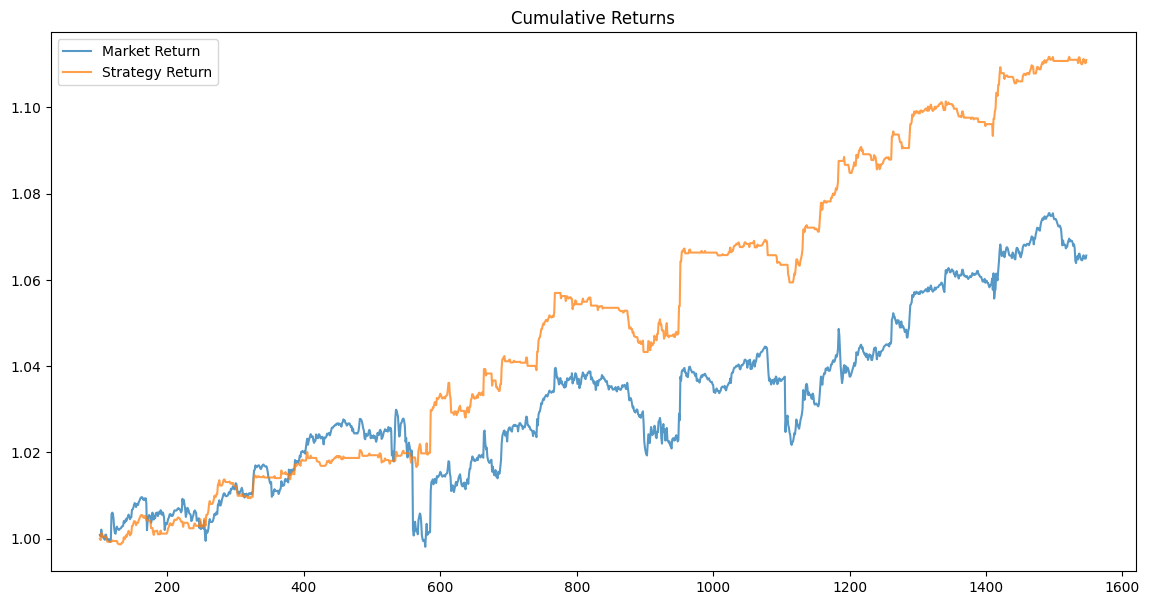

In [816]:


plt.figure(figsize=(14, 7))
plt.plot(data_e_df['Cumulative Market Return'], label='Market Return', alpha=0.75)
plt.plot(data_e_df['Cumulative Strategy Return'], label='Strategy Return', alpha=0.75)
plt.title("Cumulative Returns")
plt.legend()
plt.show()

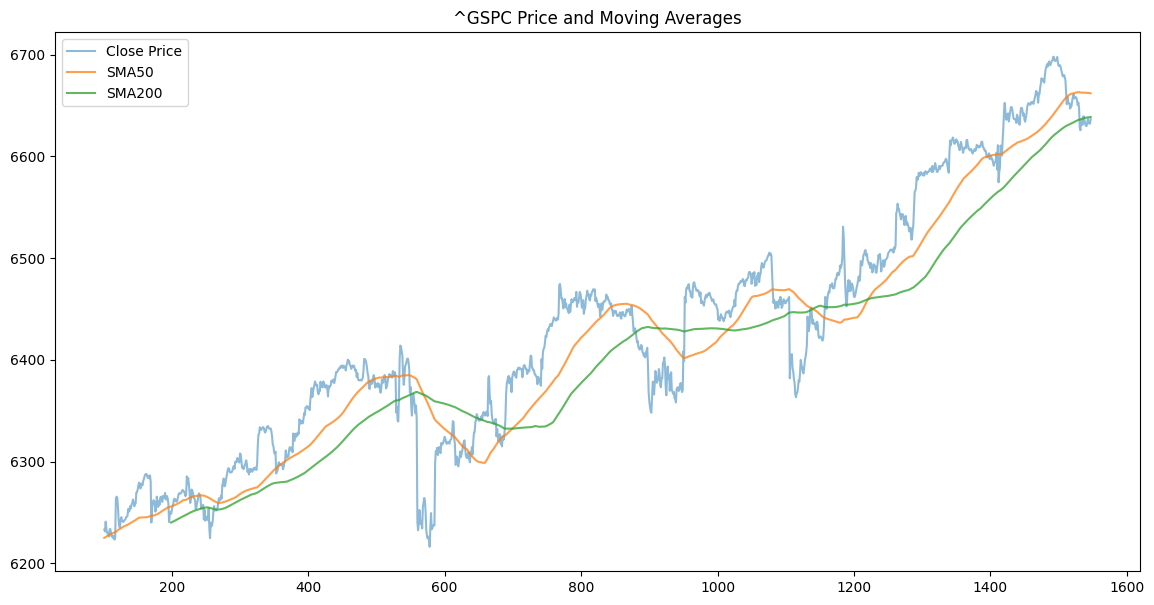

In [817]:
plt.figure(figsize=(14, 7))
plt.plot(data_e_df['Close'], label='Close Price', alpha=0.5)
#plt.plot(data_e2_df['SMA20'], label='SMA20', alpha=0.75)
plt.plot(data_e_df['SMA50'], label='SMA50', alpha=0.75)
plt.plot(data_e_df['SMA200'], label='SMA200', alpha=0.75)
plt.title(f"{ticker} Price and Moving Averages")
plt.legend()
plt.show()

In [818]:
total_strategy_return = data_e_df['Cumulative Strategy Return'].iloc[-1] - 1
total_market_return = data_e_df['Cumulative Market Return'].iloc[-1] - 1

print(f"Total Strategy Return: {total_strategy_return:.2%}")
print(f"Total Market Return: {total_market_return:.2%}")

Total Strategy Return: 11.10%
Total Market Return: 6.57%


In [767]:
icols_ls = ['Datetime','Close', 'Open_adj', 'SMA50','sma50_diff', 'signal',
       'order_number', 'order_step', 'strategy_gain', 'pp_change_gain', 'order_gain_balance', 'order_loss_balance',
       'acum_strategy_gain', 'pp_strategy_gain','slope4','tendency',
       'current_return','strategy_return', 'Cumulative Market Return', 'Cumulative Strategy Return']

#data_e_df[icols_ls]

data_e_df[
    #data_e_df['order_number'].isin([1,2])
    #data_e2_df['order_number'].isin([69,70])
    #data_e2_df['signal']==-1
    (data_e_df['index']>=350)&(data_e_df['index']<=400)
][icols_ls]



,Datetime,Close,Open_adj,SMA50,sma50_diff,signal,order_number,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,acum_strategy_gain,pp_strategy_gain,slope4,tendency,current_return,strategy_return,Cumulative Market Return,Cumulative Strategy Return
350,2025-07-21 19:30:00+00:00,6309.370117,6314.839844,6291.810010,17.560107,0,37,12,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-4.652002,-6,-0.000866,-0.000000,1.013101,1.006861
351,2025-07-21 19:45:00+00:00,6307.459961,6309.370117,6292.426709,15.033252,0,37,13,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-3.307031,-6,-0.000303,-0.000000,1.012794,1.006861
352,2025-07-22 13:30:00+00:00,6309.669922,6307.459961,6293.075410,16.594512,0,37,14,0.000000,-0.000000,1.560059,-2.060059,-0.500000,-0.000079,-1.741992,-6,0.000350,0.000000,1.013149,1.006861
353,2025-07-22 13:45:00+00:00,6288.279785,6309.669922,6293.534507,-5.254722,0,37,15,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-6.106104,-7,-0.003390,-0.000000,1.009715,1.006861
354,2025-07-22 14:00:00+00:00,6291.040039,6288.279785,6293.903906,-2.863867,0,37,16,0.000000,-0.000000,1.560059,-2.060059,-0.500000,-0.000079,-7.064990,-8,0.000439,0.000000,1.010158,1.006861
355,2025-07-22 14:15:00+00:00,6290.879883,6291.040039,6294.469204,-3.589321,0,37,17,-0.000000,0.000000,1.560059,-2.060059,-0.500000,-0.000079,-5.360986,-8,-0.000025,-0.000000,1.010132,1.006861
356,2025-07-22 14:30:00+00:00,6297.319824,6290.879883,6295.195303,2.124521,1,38,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.695996,1,0.001024,0.000000,1.011166,1.006861
357,2025-07-22 14:45:00+00:00,6299.310059,6297.319824,6295.789502,3.520557,1,38,2,1.990234,0.000000,1.990234,0.000000,1.990234,0.000316,3.125000,2,0.000316,0.000316,1.011486,1.007179
358,2025-07-22 15:00:00+00:00,6296.459961,6299.310059,6296.391104,0.068857,0,38,3,-2.850098,-1.432041,1.990234,-2.850098,-0.859863,-0.000137,1.873047,2,-0.000452,-0.000452,1.011028,1.006723
359,2025-07-22 15:15:00+00:00,6296.979980,6296.459961,6296.987202,-0.007222,0,38,4,0.000000,-0.000000,1.990234,-2.850098,-0.859863,-0.000137,-0.386963,-1,0.000083,0.000000,1.011112,1.006723


In [768]:
data_e_df[icols_ls].tail(30)

,Datetime,Close,Open_adj,SMA50,sma50_diff,signal,order_number,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,acum_strategy_gain,pp_strategy_gain,slope4,tendency,current_return,strategy_return,Cumulative Market Return,Cumulative Strategy Return
1518,2025-09-23 19:00:00+00:00,6649.009766,6647.029785,6661.491392,-12.481626,0,226,39,0.000000,0.000000,27.191406,-15.491211,11.700195,0.001751,-1.497168,-10,0.000298,0.000000,1.067637,1.107240
1519,2025-09-23 19:15:00+00:00,6649.479980,6649.009766,6661.703789,-12.223809,0,226,40,0.000000,0.000000,27.191406,-15.491211,11.700195,0.001751,-0.651025,-10,0.000071,0.000000,1.067713,1.107240
1520,2025-09-23 19:30:00+00:00,6655.319824,6649.479980,6661.815488,-6.495664,1,227,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.534033,1,0.000878,0.000000,1.068650,1.107240
1521,2025-09-23 19:45:00+00:00,6658.089844,6655.319824,6661.870186,-3.780342,1,227,2,2.770020,0.000000,2.770020,0.000000,2.770020,0.000416,3.308008,2,0.000416,0.000416,1.069095,1.107701
1522,2025-09-24 13:30:00+00:00,6661.109863,6658.089844,6662.037485,-0.927622,1,227,3,3.020020,1.090252,5.790039,0.000000,5.790039,0.000870,3.765967,3,0.000454,0.000454,1.069580,1.108204
1523,2025-09-24 13:45:00+00:00,6656.910156,6661.109863,6662.245688,-5.335532,0,227,4,-4.199707,-0.725333,5.790039,-4.199707,1.590332,0.000239,0.779102,3,-0.000630,-0.000630,1.068906,1.107505
1524,2025-09-24 14:00:00+00:00,6658.600098,6656.910156,6662.463589,-3.863491,0,227,5,0.000000,0.000000,5.790039,-4.199707,1.590332,0.000239,-0.266895,-1,0.000254,0.000000,1.069177,1.107505
1525,2025-09-24 14:15:00+00:00,6657.859863,6658.600098,6662.629687,-4.769824,0,227,6,-0.000000,-0.000000,5.790039,-4.199707,1.590332,0.000239,-0.806006,-2,-0.000111,-0.000000,1.069058,1.107505
1526,2025-09-24 14:30:00+00:00,6657.830078,6657.859863,6662.784590,-4.954512,0,227,7,-0.000000,-0.000000,5.790039,-4.199707,1.590332,0.000239,0.201953,1,-0.000004,-0.000000,1.069054,1.107505
1527,2025-09-24 14:45:00+00:00,6655.279785,6657.830078,6662.994390,-7.714604,0,227,8,-0.000000,-0.000000,5.790039,-4.199707,1.590332,0.000239,-0.999072,-1,-0.000383,-0.000000,1.068644,1.107505


In [769]:
orders_df = data_e_df.loc[
    (data_e2_df['signal'] == 0)
    &(data_e2_df['strategy_gain'] == 0)==False
    ].copy()

orders_df['order_candles'] = orders_df.groupby(['order_number'])['index'].transform('count')

ordersgain_df = orders_df.groupby(['order_number'], as_index=False).last().copy()

ordersgain_df['is_profitable'] = False

ordersgain_df.loc[
    ordersgain_df['acum_strategy_gain']>0
    ,'is_profitable']=True

obs_df = ordersgain_df.groupby(
    ['is_profitable'],
    as_index = False
).agg(
    oreders = ('order_number','count'),
    gain_amount = ('acum_strategy_gain','sum'),
    gain_avg = ('acum_strategy_gain','mean'),
    candles = ('order_candles','mean'),
).copy()

obs_df

,is_profitable,oreders,gain_amount,gain_avg,candles
0,False,90,-499.148926,-5.546099,3.666667
1,True,103,1154.541016,11.209136,5.902913


In [486]:
loss_amount = obs_df[obs_df['is_profitable']==False]['gain_amount'].iloc[0]
gain_amount = obs_df[obs_df['is_profitable']==True]['gain_amount'].iloc[0]

strategy_amount_gain = gain_amount + loss_amount
strategy_amount_gain

np.float64(502.06982421875)

In [468]:
init_price = data_e_df['Close'].iloc[1]
final_price =data_e_df['Close'].iloc[-1]

market_amount_gain = final_price - init_price
market_amount_gain

np.float64(402.35986328125)

In [386]:
ordersgain_df.sort_values('acum_strategy_gain')

,order_number,index,Datetime,Close,High,Low,Open,Volume,Date,SMA20,...,order_step,strategy_gain,pp_change_gain,order_gain_balance,order_loss_balance,strategy_return,acum_strategy_gain,pp_strategy_gain,order_candles,is_profitable
93,94,1106,2025-09-02 13:30:00+00:00,6381.930176,6401.509766,6369.569824,6401.509766,96942551,2025-09-02,6453.319482,...,2,-79.889648,0.000000,0.000000,-79.889648,-0.012363,-79.889648,-0.012363,2,False
117,118,1412,2025-09-17 18:30:00+00:00,6574.549805,6612.930176,6568.990234,6611.279785,107979000,2025-09-17,6597.382056,...,2,-36.510254,0.000000,0.000000,-36.510254,-0.005523,-36.510254,-0.005523,2,False
94,95,1112,2025-09-02 15:00:00+00:00,6380.990234,6390.859863,6380.149902,6388.209961,83045808,2025-09-02,6434.859009,...,4,-7.419922,0.431141,0.000000,-24.629883,-0.001161,-24.629883,-0.003845,4,False
38,39,539,2025-07-31 14:45:00+00:00,6385.509766,6404.399902,6384.729980,6404.149902,125061392,2025-07-31,6381.917505,...,3,-18.760254,4.949884,0.000000,-22.550293,-0.002929,-22.550293,-0.003519,3,False
77,78,935,2025-08-21 16:15:00+00:00,6366.470215,6372.560059,6364.490234,6368.779785,49178984,2025-08-21,6381.644019,...,4,-2.279785,0.120115,0.000000,-21.259766,-0.000358,-21.259766,-0.003328,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,691,2025-08-08 13:45:00+00:00,6376.350098,6377.620117,6365.649902,6365.649902,125451031,2025-08-08,6332.126514,...,3,10.919922,0.448455,35.270020,0.000000,0.001716,35.270020,0.005562,3,True
37,38,534,2025-07-31 13:30:00+00:00,6400.779785,6427.020020,6397.959961,6427.020020,341811326,2025-07-31,6375.700024,...,2,35.949707,0.000000,35.949707,0.000000,0.005648,35.949707,0.005648,2,True
97,98,1132,2025-09-03 13:30:00+00:00,6442.479980,6445.819824,6436.299805,6445.819824,96309799,2025-09-03,6389.089038,...,5,27.529785,1.723821,43.500000,0.000000,0.004292,43.500000,0.006798,5,True
44,45,586,2025-08-04 13:30:00+00:00,6297.759766,6298.970215,6271.709961,6271.709961,93732957,2025-08-04,6241.962524,...,3,60.459961,151.186813,60.859863,0.000000,0.009693,60.859863,0.009758,3,True


In [387]:
gains_df = ordersgain_df[ordersgain_df['acum_strategy_gain']>0][['order_number','acum_strategy_gain','order_candles']]
gains_df['bucket_gain'] = pd.qcut(gains_df['acum_strategy_gain'],11, labels=False)

obs_df = gains_df.groupby(
    ['bucket_gain'],
    as_index=False
).agg(
    min_gain = ('acum_strategy_gain','min'),
    max_gain = ('acum_strategy_gain','max'),
    avg_gain = ('acum_strategy_gain','mean'),
    total_gain = ('acum_strategy_gain','sum'),
    frequence = ('acum_strategy_gain','count'),
    candles = ('order_candles','mean'),
).copy()

obs_df

,bucket_gain,min_gain,max_gain,avg_gain,total_gain,frequence,candles
0,0,0.089844,0.459961,0.275600,1.929199,7,3.428571
1,1,0.599609,1.390137,0.871663,5.229980,6,3.500000
2,2,1.490234,1.779785,1.633301,9.799805,6,3.500000
3,3,1.819824,2.329590,2.041585,12.249512,6,3.500000
4,4,2.379883,3.029785,2.718180,16.309082,6,4.500000
5,5,3.390137,4.180176,3.788435,26.519043,7,4.428571
6,6,5.000000,7.430176,6.746663,40.479980,6,7.833333
7,7,7.450195,10.970215,9.260091,55.560547,6,6.833333
8,8,11.279785,16.669922,13.708333,82.250000,6,4.166667
9,9,17.279785,32.310059,27.088298,162.529785,6,9.500000


In [388]:
gains_df.columns

Index(['order_number', 'acum_strategy_gain', 'order_candles', 'bucket_gain'], dtype='object')

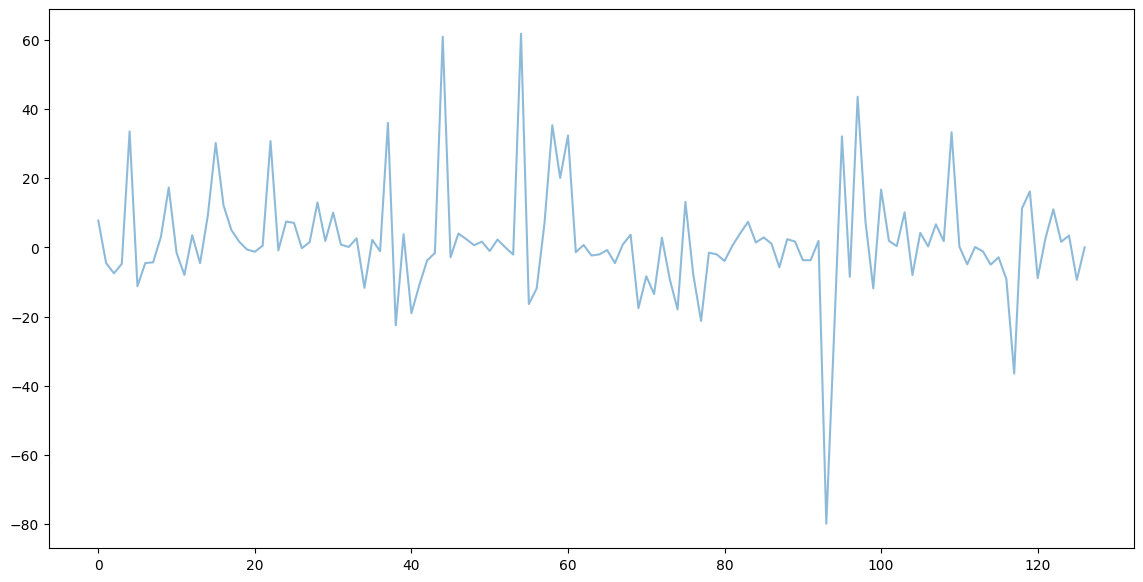

In [389]:
plt.figure(figsize=(14, 7))
plt.plot(ordersgain_df['acum_strategy_gain'], label='Strategy Gain', alpha=0.5)

# Example 3 (Daily temp)

In [1189]:
# Define parameters
ticker = "^GSPC"  
#start_date = "2025-01-01"
#end_date = "2025-06-01"

# Fetch historical stock data
data = yf.download('^GSPC', interval="1d", period='3y')
#data = yf.download('^GSPC', interval="1d", start="2024-01-01", end="2024-03-31")

data = data.reset_index()
data = data.reset_index()

data.columns = [c[0] for c in data.columns]

# Display first few rows
print(data.shape)
print(data.tail())

/tmp/ipykernel_586164/1701828533.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^GSPC', interval="1d", period='3y')
[*********************100%***********************]  1 of 1 completed

(751, 7)
     index       Date        Close         High          Low         Open  \
746    746 2025-09-17  6600.350098  6624.390137  6551.149902  6604.870117   
747    747 2025-09-18  6631.959961  6656.799805  6611.890137  6626.850098   
748    748 2025-09-19  6664.359863  6671.819824  6630.310059  6647.109863   
749    749 2025-09-22  6693.750000  6698.879883  6648.069824  6654.279785   
750    750 2025-09-23  6656.919922  6699.520020  6645.580078  6692.439941   

         Volume  
746  5805340000  
747  5292400000  
748  9125960000  
749  5642620000  
750  5633620000  


In [1190]:
data_e3_df = data.copy()


data_e3_df['SMA50'] = data_e3_df['Close'].rolling(window=90).mean()
data_e3_df['SMA200'] = data_e3_df['Close'].rolling(window=200).mean()

# Calculate daily percentage change in stock prices
data_e3_df['current_return'] = data_e3_df['Close'].pct_change()
data_e3_df['Open_adj'] = data_e3_df['Close'].shift(1)

data_e3_df['sma50_diff'] = data_e3_df['Close'] - data_e3_df['SMA50']

data_e3_df

,index,Date,Close,High,Low,Open,Volume,SMA50,SMA200,current_return,Open_adj,sma50_diff
0,0,2022-09-26,3655.040039,3715.669922,3644.760010,3682.719971,4886140000,NaN,NaN,NaN,NaN,NaN
1,1,2022-09-27,3647.290039,3717.530029,3623.290039,3686.439941,4577740000,NaN,NaN,-0.002120,3655.040039,NaN
2,2,2022-09-28,3719.040039,3736.739990,3640.610107,3651.939941,4684850000,NaN,NaN,0.019672,3647.290039,NaN
3,3,2022-09-29,3640.469971,3687.010010,3610.399902,3687.010010,4681810000,NaN,NaN,-0.021126,3719.040039,NaN
4,4,2022-09-30,3585.620117,3671.439941,3584.129883,3633.479980,5645360000,NaN,NaN,-0.015067,3640.469971,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
746,746,2025-09-17,6600.350098,6624.390137,6551.149902,6604.870117,5805340000,6225.302756,5994.146240,-0.000970,6606.759766,375.047342
747,747,2025-09-18,6631.959961,6656.799805,6611.890137,6626.850098,5292400000,6236.103309,5997.312339,0.004789,6600.350098,395.856651
748,748,2025-09-19,6664.359863,6671.819824,6630.310059,6647.109863,9125960000,6245.216309,6000.472239,0.004885,6631.959961,419.143555
749,749,2025-09-22,6693.750000,6698.879883,6648.069824,6654.279785,5642620000,6254.185200,6003.705239,0.004410,6664.359863,439.564800


In [1191]:
diff_df = data_e3_df[data_e3_df['sma50_diff']>=0][['sma50_diff']]
diff_df['bucket_diff'] = pd.qcut(diff_df['sma50_diff'],11, labels=False)

diff_df

obs_df = diff_df.groupby(
    ['bucket_diff'],
    as_index=False
).agg(
    min_diff = ('sma50_diff','min'),
    max_diff = ('sma50_diff','max'),
    avg_diff = ('sma50_diff','mean'),
    frequence = ('sma50_diff','count'),
).copy()

obs_df

,bucket_diff,min_diff,max_diff,avg_diff,frequence
0,0,0.370879,75.684245,43.815860,51
1,1,75.981755,111.966683,94.810123,50
2,2,112.066808,148.416797,130.359820,50
3,3,148.574913,176.518506,162.345936,50
4,4,177.010243,219.952653,200.009154,50
5,5,221.050895,250.752338,235.240566,50
6,6,252.020234,283.059104,266.172801,50
7,7,283.089969,319.578733,302.221246,50
8,8,320.624778,360.376796,341.241496,50
9,9,360.464437,411.707742,384.535049,50


In [1297]:
data_e3_df['slope3'] = slope_f(data_e3_df, 'Close', 3)
data_e3_df['slope4'] = slope_f(data_e3_df, 'Close', 4)
data_e3_df

,index,Date,Close,High,Low,Open,Volume,SMA50,SMA200,current_return,...,order_step,strategy_gain,pp_change_gain,strategy_return,acum_strategy_gain,pp_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,tendency,acceleration
0,0,2022-09-26,3655.040039,3715.669922,3644.760010,3682.719971,4886140000,NaN,NaN,0.000000,...,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8,-1
1,1,2022-09-27,3647.290039,3717.530029,3623.290039,3686.439941,4577740000,NaN,NaN,0.000000,...,2,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8,-1
2,2,2022-09-28,3719.040039,3736.739990,3640.610107,3651.939941,4684850000,NaN,NaN,0.000000,...,3,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8,-1
3,3,2022-09-29,3640.469971,3687.010010,3610.399902,3687.010010,4681810000,NaN,NaN,0.000000,...,4,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8,-1
4,4,2022-09-30,3585.620117,3671.439941,3584.129883,3633.479980,5645360000,NaN,NaN,0.000000,...,5,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,746,2025-09-17,6600.350098,6624.390137,6551.149902,6604.870117,5805340000,6225.302756,5994.146240,-0.000970,...,9,-6.409668,-0.051171,-0.000970,118.850098,0.018337,1.794339,1.703171,5,-2
747,747,2025-09-18,6631.959961,6656.799805,6611.890137,6626.850098,5292400000,6236.103309,5997.312339,0.004789,...,10,31.609863,0.265964,0.004789,150.459961,0.023214,1.802932,1.711328,6,1
748,748,2025-09-19,6664.359863,6671.819824,6630.310059,6647.109863,9125960000,6245.216309,6000.472239,0.004885,...,11,32.399902,0.215339,0.004885,182.859863,0.028213,1.811740,1.719689,7,2
749,749,2025-09-22,6693.750000,6698.879883,6648.069824,6654.279785,5642620000,6254.185200,6003.705239,0.004410,...,12,29.390137,0.160725,0.004410,212.250000,0.032747,1.819730,1.727272,8,3


In [1298]:
slopes_df = data_e3_df[data_e3_df['slope4'].isnull()==False][['slope4']]
slopes_df['bucket_slope'] = pd.qcut(slopes_df['slope4'],11, labels=False)

slopes_df

obs_df = slopes_df.groupby(
    ['bucket_slope'],
    as_index=False
).agg(
    min_s= ('slope4','min'),
    max_s = ('slope4','max'),
    avg_s = ('slope4','mean'),
    frequence = ('slope4','count'),
).copy()

obs_df

,bucket_slope,min_s,max_s,avg_s,frequence
0,0,-152.180054,-24.140015,-39.710524,68
1,1,-23.907471,-12.732422,-17.363702,68
2,2,-12.674927,-6.277588,-9.474309,68
3,3,-6.219971,-1.520020,-3.701213,68
4,4,-1.442505,2.922485,0.641646,68
5,5,2.989990,6.832520,4.841029,68
6,6,6.860107,10.392456,8.630995,68
7,7,10.405029,14.255005,12.470625,68
8,8,14.285034,18.847534,16.501555,68
9,9,18.872437,25.679932,21.945841,68


In [1299]:
info = data_e3_df.apply(lambda x: tendency_f(x), axis=1)
icols_ls = ['tendency', 'acceleration']
info_df = pd.DataFrame(info.tolist(), columns=icols_ls)

data_e3_df.loc[:,icols_ls] = info_df.loc[:,icols_ls]
data_e3_df

,index,Date,Close,High,Low,Open,Volume,SMA50,SMA200,current_return,...,order_step,strategy_gain,pp_change_gain,strategy_return,acum_strategy_gain,pp_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,tendency,acceleration
0,0,2022-09-26,3655.040039,3715.669922,3644.760010,3682.719971,4886140000,NaN,NaN,0.000000,...,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8,-1
1,1,2022-09-27,3647.290039,3717.530029,3623.290039,3686.439941,4577740000,NaN,NaN,0.000000,...,2,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8,-1
2,2,2022-09-28,3719.040039,3736.739990,3640.610107,3651.939941,4684850000,NaN,NaN,0.000000,...,3,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8,-1
3,3,2022-09-29,3640.469971,3687.010010,3610.399902,3687.010010,4681810000,NaN,NaN,0.000000,...,4,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0,-1
4,4,2022-09-30,3585.620117,3671.439941,3584.129883,3633.479980,5645360000,NaN,NaN,0.000000,...,5,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,746,2025-09-17,6600.350098,6624.390137,6551.149902,6604.870117,5805340000,6225.302756,5994.146240,-0.000970,...,9,-6.409668,-0.051171,-0.000970,118.850098,0.018337,1.794339,1.703171,5,-2
747,747,2025-09-18,6631.959961,6656.799805,6611.890137,6626.850098,5292400000,6236.103309,5997.312339,0.004789,...,10,31.609863,0.265964,0.004789,150.459961,0.023214,1.802932,1.711328,6,1
748,748,2025-09-19,6664.359863,6671.819824,6630.310059,6647.109863,9125960000,6245.216309,6000.472239,0.004885,...,11,32.399902,0.215339,0.004885,182.859863,0.028213,1.811740,1.719689,7,2
749,749,2025-09-22,6693.750000,6698.879883,6648.069824,6654.279785,5642620000,6254.185200,6003.705239,0.004410,...,12,29.390137,0.160725,0.004410,212.250000,0.032747,1.819730,1.727272,8,3


In [1300]:
# Computes Orders ans order steps

signal_ls = [0]

prev_signal_ls = [0]
order_number_ls = [0]
order_step_ls = [0]
open_price_ls = [0]
acum_strategy_gain_ls = [0] 

def orders_steps_f(x):
    index = x['index']
    openn = x['Open_adj']
    close = x['Close']
    current_return = x['current_return']
    sma50 = x['SMA50']
    sma200 = x['SMA200']
    slope = x['slope4']
    tendency = x['tendency']

    signal = signal_ls[0]
    order_number = order_number_ls[0]
    order_step = order_step_ls[0]
    open_price = open_price_ls[0]
    acum_strategy_gain = acum_strategy_gain_ls[0]

    start_order = False
    
    if (signal==0):

        if (slope > 2):
            signal = 1
            start_order = True

    if start_order == True:
        order_step = 0
        order_number = order_number + 1
        open_price = close

    order_step = order_step + 1

    strategy_gain = (close - openn) * signal
    strategy_return = current_return * signal
    if order_step == 1:
        strategy_gain = 0
        acum_strategy_gain = 0
        strategy_return = 0   
        
    if acum_strategy_gain != 0:
        pp_change_gain = strategy_gain / acum_strategy_gain
    else:
        pp_change_gain = 0

    acum_strategy_gain = acum_strategy_gain + strategy_gain

    if open_price != 0:
        pp_strategy_gain = acum_strategy_gain / open_price
    else:
        pp_strategy_gain = 0     

    if (signal==1):
        #if (close < sma50):
        #    signal = 0
        if (acum_strategy_gain >= 500):
            signal = 0
        if (pp_change_gain < -0.7):
            signal = 0
        if (slope < -200):
            signal = 0

    signal_ls[0] = signal
    order_number_ls[0] = order_number
    order_step_ls[0] = order_step
    open_price_ls[0] = open_price
    acum_strategy_gain_ls[0] = acum_strategy_gain

    return signal, open_price, order_number, order_step, strategy_gain, pp_change_gain, strategy_return, acum_strategy_gain, pp_strategy_gain

info = data_e3_df.apply(lambda x: orders_steps_f(x), axis=1)
cols_ls = ['signal', 'open_price', 'order_number', 'order_step', 'strategy_gain', 'pp_change_gain', 'strategy_return', 'acum_strategy_gain', 'pp_strategy_gain']
info_df = pd.DataFrame(info.tolist(), columns=cols_ls).copy()

data_e3_df.loc[:,cols_ls] = info_df.loc[:,cols_ls]

data_e3_df

,index,Date,Close,High,Low,Open,Volume,SMA50,SMA200,current_return,...,order_step,strategy_gain,pp_change_gain,strategy_return,acum_strategy_gain,pp_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,tendency,acceleration
0,0,2022-09-26,3655.040039,3715.669922,3644.760010,3682.719971,4886140000,NaN,NaN,0.000000,...,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8,-1
1,1,2022-09-27,3647.290039,3717.530029,3623.290039,3686.439941,4577740000,NaN,NaN,0.000000,...,2,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8,-1
2,2,2022-09-28,3719.040039,3736.739990,3640.610107,3651.939941,4684850000,NaN,NaN,0.000000,...,3,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8,-1
3,3,2022-09-29,3640.469971,3687.010010,3610.399902,3687.010010,4681810000,NaN,NaN,0.000000,...,4,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0,-1
4,4,2022-09-30,3585.620117,3671.439941,3584.129883,3633.479980,5645360000,NaN,NaN,0.000000,...,5,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,746,2025-09-17,6600.350098,6624.390137,6551.149902,6604.870117,5805340000,6225.302756,5994.146240,-0.000970,...,57,-6.409668,-0.014779,-0.000970,427.280273,0.069217,1.794339,1.703171,5,-2
747,747,2025-09-18,6631.959961,6656.799805,6611.890137,6626.850098,5292400000,6236.103309,5997.312339,0.004789,...,58,31.609863,0.073979,0.004789,458.890137,0.074337,1.802932,1.711328,6,1
748,748,2025-09-19,6664.359863,6671.819824,6630.310059,6647.109863,9125960000,6245.216309,6000.472239,0.004885,...,59,32.399902,0.070605,0.004885,491.290039,0.079586,1.811740,1.719689,7,2
749,749,2025-09-22,6693.750000,6698.879883,6648.069824,6654.279785,5642620000,6254.185200,6003.705239,0.004410,...,60,29.390137,0.059822,0.004410,520.680176,0.084347,1.819730,1.727272,8,3


In [1301]:
data_e3_df.value_counts(['signal'])

signal
1         637
0         114
Name: count, dtype: int64

In [1302]:
# Calculate cumulative returns
data_e3_df.loc[
    data_e3_df['order_number']==0
    , 'current_return'] = 0

data_e3_df['Cumulative Market Return'] = (1 + data_e3_df['current_return']).cumprod()
    
data_e3_df['Cumulative Strategy Return'] = (1 + data_e3_df['strategy_return']).cumprod()
data_e3_df

,index,Date,Close,High,Low,Open,Volume,SMA50,SMA200,current_return,...,order_step,strategy_gain,pp_change_gain,strategy_return,acum_strategy_gain,pp_strategy_gain,Cumulative Market Return,Cumulative Strategy Return,tendency,acceleration
0,0,2022-09-26,3655.040039,3715.669922,3644.760010,3682.719971,4886140000,NaN,NaN,0.000000,...,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8,-1
1,1,2022-09-27,3647.290039,3717.530029,3623.290039,3686.439941,4577740000,NaN,NaN,0.000000,...,2,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8,-1
2,2,2022-09-28,3719.040039,3736.739990,3640.610107,3651.939941,4684850000,NaN,NaN,0.000000,...,3,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,8,-1
3,3,2022-09-29,3640.469971,3687.010010,3610.399902,3687.010010,4681810000,NaN,NaN,0.000000,...,4,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0,-1
4,4,2022-09-30,3585.620117,3671.439941,3584.129883,3633.479980,5645360000,NaN,NaN,0.000000,...,5,-0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,746,2025-09-17,6600.350098,6624.390137,6551.149902,6604.870117,5805340000,6225.302756,5994.146240,-0.000970,...,57,-6.409668,-0.014779,-0.000970,427.280273,0.069217,1.794339,1.704889,5,-2
747,747,2025-09-18,6631.959961,6656.799805,6611.890137,6626.850098,5292400000,6236.103309,5997.312339,0.004789,...,58,31.609863,0.073979,0.004789,458.890137,0.074337,1.802932,1.713054,6,1
748,748,2025-09-19,6664.359863,6671.819824,6630.310059,6647.109863,9125960000,6245.216309,6000.472239,0.004885,...,59,32.399902,0.070605,0.004885,491.290039,0.079586,1.811740,1.721423,7,2
749,749,2025-09-22,6693.750000,6698.879883,6648.069824,6654.279785,5642620000,6254.185200,6003.705239,0.004410,...,60,29.390137,0.059822,0.004410,520.680176,0.084347,1.819730,1.729015,8,3


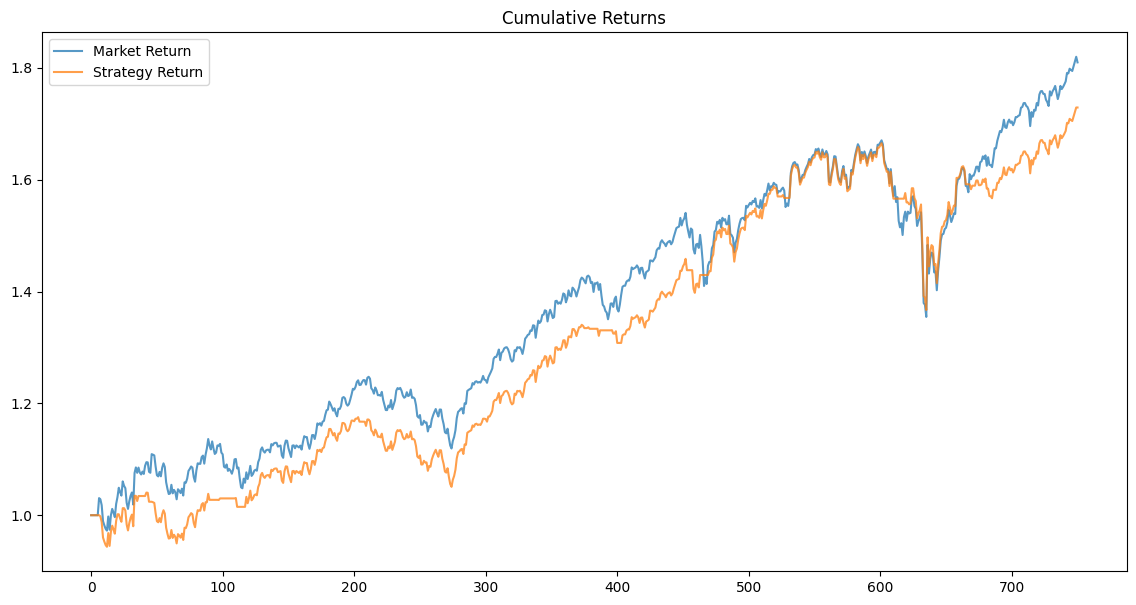

In [1303]:
plt.figure(figsize=(14, 7))
plt.plot(data_e3_df['Cumulative Market Return'], label='Market Return', alpha=0.75)
plt.plot(data_e3_df['Cumulative Strategy Return'], label='Strategy Return', alpha=0.75)
plt.title("Cumulative Returns")
plt.legend()
plt.show()

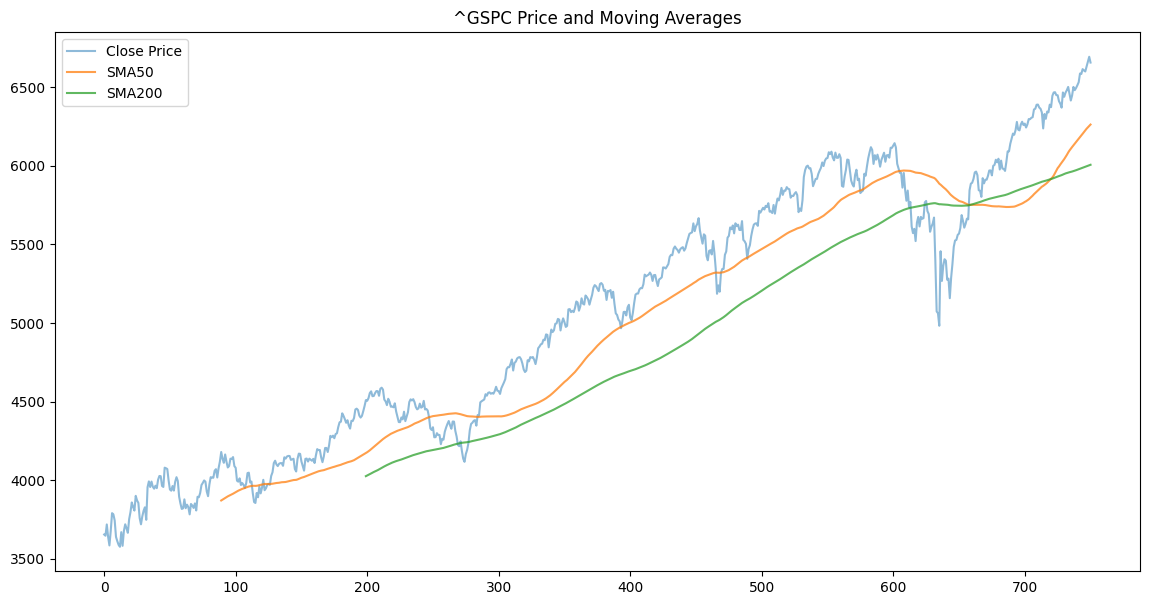

In [926]:
plt.figure(figsize=(14, 7))
plt.plot(data_e3_df['Close'], label='Close Price', alpha=0.5)
plt.plot(data_e3_df['SMA50'], label='SMA50', alpha=0.75)
plt.plot(data_e3_df['SMA200'], label='SMA200', alpha=0.75)
plt.title(f"{ticker} Price and Moving Averages")
plt.legend()
plt.show()

In [927]:
total_strategy_return = data_e3_df['Cumulative Strategy Return'].iloc[-1] - 1
total_market_return = data_e3_df['Cumulative Market Return'].iloc[-1] - 1

print(f"Total Strategy Return: {total_strategy_return:.2%}")
print(f"Total Market Return: {total_market_return:.2%}")

Total Strategy Return: 69.00%
Total Market Return: 66.72%


In [1304]:
icols_ls = ['index', 'Date','Close', 'Open_adj', 'SMA50',
       'SMA200', 'current_return', 'sma50_diff', 'signal',
       'order_number', 'order_step', 'strategy_gain', 'pp_change_gain',
       'strategy_return', 'acum_strategy_gain', 'pp_strategy_gain', 'slope4',
       'Cumulative Market Return', 'Cumulative Strategy Return']


data_e3_df[
    #data_e3_df['order_number'].isin([5])
    #data_e2_df['order_number'].isin([69,70])
    #data_e2_df['signal']==-1
    (data_e3_df['index']>=0)&(data_e3_df['index']<=50)
][icols_ls]

,index,Date,Close,Open_adj,SMA50,SMA200,current_return,sma50_diff,signal,order_number,order_step,strategy_gain,pp_change_gain,strategy_return,acum_strategy_gain,pp_strategy_gain,slope4,Cumulative Market Return,Cumulative Strategy Return
0,0,2022-09-26,3655.040039,NaN,NaN,NaN,0.000000,NaN,0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000
1,1,2022-09-27,3647.290039,3655.040039,NaN,NaN,0.000000,NaN,0,0,2,-0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000
2,2,2022-09-28,3719.040039,3647.290039,NaN,NaN,0.000000,NaN,0,0,3,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000
3,3,2022-09-29,3640.469971,3719.040039,NaN,NaN,0.000000,NaN,0,0,4,-0.000000,0.000000,0.000000,0.000000,0.000000,-3.642517,1.000000,1.000000
4,4,2022-09-30,3585.620117,3640.469971,NaN,NaN,0.000000,NaN,0,0,5,-0.000000,0.000000,0.000000,0.000000,0.000000,-15.417480,1.000000,1.000000
5,5,2022-10-03,3678.429932,3585.620117,NaN,NaN,0.000000,NaN,0,0,6,0.000000,0.000000,0.000000,0.000000,0.000000,-10.152527,1.000000,1.000000
6,6,2022-10-04,3790.929932,3678.429932,NaN,NaN,0.030584,NaN,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000,37.614990,1.030584,1.000000
7,7,2022-10-05,3783.280029,3790.929932,NaN,NaN,-0.002018,NaN,1,1,2,-7.649902,0.000000,-0.002018,-7.649902,-0.002018,49.414978,1.028504,0.997982
8,8,2022-10-06,3744.520020,3783.280029,NaN,NaN,-0.010245,NaN,1,1,3,-38.760010,5.066733,-0.010245,-46.409912,-0.012242,16.522522,1.017967,0.987758
9,9,2022-10-07,3639.659912,3744.520020,NaN,NaN,-0.028004,NaN,1,1,4,-104.860107,2.259433,-0.028004,-151.270020,-0.039903,-37.817505,0.989460,0.960097


In [931]:
data_e3_df[icols_ls].tail(15)

,index,Date,Close,Open_adj,SMA50,SMA200,current_return,sma50_diff,signal,order_number,order_step,strategy_gain,pp_change_gain,strategy_return,acum_strategy_gain,pp_strategy_gain,slope4,Cumulative Market Return,Cumulative Strategy Return
736,736,2025-09-03,6448.259766,6415.540039,6119.854313,5963.858240,0.005100,328.405452,1,41,51,32.719727,0.083817,0.005100,423.089844,0.070220,-13.400024,1.614919,1.656888
737,737,2025-09-04,6502.080078,6448.259766,6130.708426,5966.441741,0.008346,371.371653,1,41,52,53.820312,0.127208,0.008346,476.910156,0.079153,10.455078,1.628398,1.670717
738,738,2025-09-05,6481.500000,6502.080078,6141.294537,5969.103391,-0.003165,340.205463,1,41,53,-20.580078,-0.043153,-0.003165,456.330078,0.075737,16.489990,1.623244,1.665429
739,739,2025-09-08,6495.149902,6481.500000,6151.675868,5972.226040,0.002106,343.474034,1,41,54,13.649902,0.029912,0.002106,469.979980,0.078003,11.722534,1.626663,1.668936
740,740,2025-09-09,6512.609863,6495.149902,6162.159755,5975.320989,0.002688,350.450109,1,41,55,17.459961,0.037150,0.002688,487.439941,0.080901,2.632446,1.631035,1.673423
741,741,2025-09-10,6532.040039,6512.609863,6172.469754,5978.396289,0.002983,359.570285,0,41,56,19.430176,0.039862,0.002983,506.870117,0.084125,12.635010,1.635901,1.678415
742,742,2025-09-11,6587.470215,6532.040039,6182.478646,5981.748091,0.008486,404.991569,1,42,1,0.000000,0.000000,0.000000,0.000000,0.000000,23.080078,1.649784,1.678415
743,743,2025-09-12,6584.290039,6587.470215,6192.855425,5984.925991,-0.000483,391.434614,1,42,2,-3.180176,0.000000,-0.000483,-3.180176,-0.000483,17.920044,1.648987,1.677605
744,744,2025-09-15,6615.279785,6584.290039,6204.059532,5988.155691,0.004707,411.220253,0,42,3,30.989746,-9.744665,0.004707,27.809570,0.004222,20.809937,1.656748,1.685501
745,745,2025-09-16,6606.759766,6615.279785,6214.898199,5991.252639,-0.001288,391.861567,1,43,1,0.000000,0.000000,0.000000,0.000000,0.000000,4.822388,1.654615,1.685501
